# Zillow Zestimate Competition
## Linear regression algorithm attempt

In [1]:
import numpy as np #arrays and matrices
import pandas as pd #data analysis
import matplotlib.pyplot as plt #plotting and visualizations
import pprint as pp #tidying up dictionaries (in our case)
%matplotlib inline 
#"""make the matplotlib graphs show in the notebook"""
import gc #garbage collection, for memory management

### Bring In The Data

In [2]:
train_df_raw= pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"]) #need the file to be in the same directory level as this notebook file
prop = pd.read_csv("properties_2016.csv") #, usecols=good_import_cols) #the properties of each house, where each house is known as parcelid in the data

C:\Users\board\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Remove and Impute Nulls
##### Impute = "assign (a value) to something by inference from the value of the products or processes to which it contributes."

In [3]:
# Number of missing values per column in property file 
train_df_merged = train_df_raw.merge(prop, on='parcelid', how = 'left')

missing_df = train_df_merged.isnull().sum(axis=0).reset_index() #find all the null rows and reset index for the next operation

#missing_df = train_df_merged.isnull().sum(axis=0).reset_index() #find all the null rows and reset index for the next operation

missing_df.columns = ['column_name', 'missing_count'] #assign name of the columns
missing_df = missing_df.loc[missing_df['missing_count']>0] #remove any features that have no empty rows
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df_merged.shape[0]
missing_df_over75 = missing_df.loc[missing_df['missing_ratio']>0.75]
print(missing_df.sort_values('missing_count', ascending=False))
missing_df_over75.sort_values('missing_count', ascending=False)

                     column_name  missing_count  missing_ratio
8            buildingclasstypeid          90259       0.999823
15          finishedsquarefeet13          90242       0.999634
5                   basementsqft          90232       0.999524
43                   storytypeid          90232       0.999524
48            yardbuildingsqft26          90180       0.998948
51                 fireplaceflag          90053       0.997541
4       architecturalstyletypeid          90014       0.997109
45        typeconstructiontypeid          89976       0.996688
18           finishedsquarefeet6          89854       0.995336
11                    decktypeid          89617       0.992711
30                   poolsizesum          89306       0.989266
31                  pooltypeid10          89114       0.987139
32                   pooltypeid2          89071       0.986663
57            taxdelinquencyflag          88492       0.980249
58            taxdelinquencyyear          88492       0

,column_name,missing_count,missing_ratio
8,buildingclasstypeid,90259,0.999823
15,finishedsquarefeet13,90242,0.999634
5,basementsqft,90232,0.999524
43,storytypeid,90232,0.999524
48,yardbuildingsqft26,90180,0.998948
51,fireplaceflag,90053,0.997541
4,architecturalstyletypeid,90014,0.997109
45,typeconstructiontypeid,89976,0.996688
18,finishedsquarefeet6,89854,0.995336
11,decktypeid,89617,0.992711


In [4]:
# Make parcel id the index 
train_df_merged.index = train_df_merged.parcelid

In [5]:
train_df_dropna = train_df_merged.drop(missing_df_over75.column_name.tolist(), axis = 1)
train_df_dropna = train_df_dropna.drop(['parcelid'],axis = 1)
train_df_dropna

,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,
11016594,0.0276,2016-01-01,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,6037.0,...,96370.0,0.0,1.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
14366692,-0.1684,2016-01-01,NaN,3.5,4.0,NaN,3.5,2263.0,2263.0,6059.0,...,96962.0,0.0,NaN,2014.0,346458.0,585529.0,2015.0,239071.0,10153.02,NaN
12098116,-0.0040,2016-01-01,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,6037.0,...,96293.0,0.0,1.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
12643413,0.0218,2016-01-02,1.0,2.0,2.0,4.0,2.0,839.0,839.0,6037.0,...,96222.0,0.0,1.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
14432541,-0.0050,2016-01-02,NaN,2.5,4.0,NaN,2.5,2283.0,2283.0,6059.0,...,96961.0,8.0,NaN,1981.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13
11509835,-0.2705,2016-01-02,1.0,4.0,4.0,1.0,4.0,3067.0,3067.0,6037.0,...,96109.0,0.0,1.0,1982.0,880650.0,2447951.0,2015.0,1567301.0,27126.57,6.037621e+13
12286022,0.0440,2016-01-02,NaN,1.0,2.0,7.0,1.0,1297.0,1297.0,6037.0,...,96091.0,0.0,1.0,1939.0,64549.0,111521.0,2015.0,46972.0,2304.97,6.037542e+13
17177301,0.1638,2016-01-02,NaN,2.5,3.0,NaN,2.5,1763.0,1763.0,6111.0,...,97101.0,6.0,NaN,1994.0,107000.0,306000.0,2015.0,199000.0,3745.50,6.111003e+13
14739064,-0.0030,2016-01-02,NaN,1.0,2.0,NaN,1.0,796.0,796.0,6059.0,...,96987.0,0.0,NaN,1984.0,66834.0,210064.0,2015.0,143230.0,2172.88,6.059042e+13


In [6]:
# Impute the mean in the missing places for the remaining columns with missing values 
mean_values = train_df_dropna.mean(axis=0) #returns Series
train_df_filledna = train_df_dropna.fillna(mean_values, inplace=True)
print(train_df_filledna)

          logerror transactiondate  airconditioningtypeid  bathroomcnt  \
parcelid                                                                 
11016594    0.0276      2016-01-01               1.000000          2.0   
14366692   -0.1684      2016-01-01               1.816372          3.5   
12098116   -0.0040      2016-01-01               1.000000          3.0   
12643413    0.0218      2016-01-02               1.000000          2.0   
14432541   -0.0050      2016-01-02               1.816372          2.5   
11509835   -0.2705      2016-01-02               1.000000          4.0   
12286022    0.0440      2016-01-02               1.816372          1.0   
17177301    0.1638      2016-01-02               1.816372          2.5   
14739064   -0.0030      2016-01-02               1.816372          1.0   
14677559    0.0843      2016-01-03               1.816372          2.0   
10854446    0.3825      2016-01-03               1.816372          2.0   
11672170   -0.0161      2016-01-03    

In [7]:
# Add the month to the data frame 
train_df_filledna['transaction_month'] = np.float64(train_df_filledna['transactiondate'].dt.month.values)
train_df_filledna.groupby(by=['transaction_month']).logerror.count()

transaction_month
1.0      6556
2.0      6333
3.0      8652
4.0      9311
5.0      9961
6.0     10922
7.0      9947
8.0     10476
9.0      9575
10.0     4977
11.0     1826
12.0     1739
Name: logerror, dtype: int64

In [8]:
numb_unique_per_col = train_df_filledna.T.apply(lambda x: x.nunique(), axis = 1)
numb_unique_per_col.sort_values(0, ascending = False)

taxamount                       85111
latitude                        73312
longitude                       71900
landtaxvaluedollarcnt           57067
taxvaluedollarcnt               55939
structuretaxvaluedollarcnt      55451
rawcensustractandblock          42647
censustractandblock             42399
lotsizesquarefeet               20017
calculatedfinishedsquarefeet     5103
finishedsquarefeet12             4983
propertyzoningdesc               1996
logerror                         1894
garagetotalsqft                   871
regionidneighborhood              495
regionidzip                       389
transactiondate                   352
regionidcity                      178
yearbuilt                         131
propertycountylandusecode          77
calculatedbathnbr                  23
bathroomcnt                        23
roomcnt                            17
bedroomcnt                         17
garagecarcnt                       16
fullbathcnt                        15
propertyland

In [9]:
train_df_filledna = train_df_filledna.drop(['assessmentyear'],axis=1)

In [10]:
numb_unique_per_col[numb_unique_per_col == 1]

assessmentyear    1
dtype: int64

In [11]:
train_df_filledna.dtypes[train_df_filledna.dtypes != "float64"].index


Index(['transactiondate', 'propertycountylandusecode', 'propertyzoningdesc'], dtype='object')

In [12]:
train_df_filledna['propertycountylandusecode']
#found strings

parcelid
11016594    0100
14366692       1
12098116    0100
12643413    010C
14432541     122
11509835    0100
12286022    0100
17177301    1129
14739064      34
14677559      34
10854446    0100
11672170    0100
10949761    0100
14665244       1
14148540     122
14057104     122
17296797    1128
12524288    010E
14091502     122
10815909    0100
12453853    0100
14253461     122
14001034     122
11458863    0104
13957980     122
12752047    0100
11188425    0100
14646051      34
10805063    010E
12524725    010C
            ... 
10757551    0100
12558267    01HC
11710734    0100
14347592     122
11341061    0100
14027878     122
12756771    0100
12758333    010C
11295458    010C
12757889    0100
11308315    0100
14353215     122
10753416    010C
11756902    010C
11994047    010C
11440746    010C
11703478    0100
10965821    0100
12067066    010C
11683263    010C
12062080    010C
12265636    0200
17109680    1111
12268527    0100
12920746    0100
10774160    010C
12046695    0100
12995

In [28]:
train_df_filledna['propertycountylandusecode'].nunique()

77

In [29]:
train_df_filledna['propertyzoningdesc']

parcelid
11016594          LARS
14366692           NaN
12098116          PSR6
12643413          LAR3
14432541           NaN
11509835        HBR3YY
12286022         CORH*
17177301           NaN
14739064           NaN
14677559           NaN
10854446         LARE9
11672170          LAR1
10949761         BUR1*
14665244           NaN
14148540           NaN
14057104           NaN
17296797           NaN
12524288         LBR4R
14091502           NaN
10815909          LAR1
12453853         LBR1N
14253461           NaN
14001034           NaN
11458863          LAR1
13957980           NaN
12752047         LMR1*
11188425    PDRPD6.6U*
14646051           NaN
10805063          LAR3
12524725         LBR4N
               ...    
10757551          LAR1
12558267         LBPD6
11710734          LAR1
14347592           NaN
11341061     LCR17500*
14027878           NaN
12756771        NOR1YY
12758333     NOR1(R3)*
11295458    LRRPD75002
12757889        NOR1YY
11308315      LRR7000*
14353215           NaN
10

In [31]:
train_df_filledna['propertyzoningdesc'].nunique()

1996

In [33]:
# Drop non numeric (float64) columns 
#cols_to_drop = cols_to_drop.append(train_df.dtypes[train_df.dtypes != "float64"].index)
#train_df2 = train_df.drop(cols_to_drop, axis = 1)
train_df2 = train_df_filledna

In [34]:
missing_df2 = train_df2.isnull().sum(axis=0).reset_index()
missing_df2.columns = ['count', 'val']
missing_df2[missing_df2['val'] > 0]


,count,val
17,propertycountylandusecode,1
19,propertyzoningdesc,31962


In [35]:
train_df2.head()

,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,transaction_month
parcelid,,,,,,,,,,,,,,,,,,,,,
11016594,0.0276,2016-01-01,1.000000,2.0,3.0,4.000000,2.0,1684.0,1684.0,6037.0,...,96370.0,0.0,1.000000,1959.0,122754.0,360170.0,237416.0,6735.88,6.037107e+13,1.0
14366692,-0.1684,2016-01-01,1.816372,3.5,4.0,5.565407,3.5,2263.0,2263.0,6059.0,...,96962.0,0.0,1.110414,2014.0,346458.0,585529.0,239071.0,10153.02,6.049151e+13,1.0
12098116,-0.0040,2016-01-01,1.000000,3.0,2.0,4.000000,3.0,2217.0,2217.0,6037.0,...,96293.0,0.0,1.000000,1940.0,61994.0,119906.0,57912.0,11484.48,6.037464e+13,1.0
12643413,0.0218,2016-01-02,1.000000,2.0,2.0,4.000000,2.0,839.0,839.0,6037.0,...,96222.0,0.0,1.000000,1987.0,171518.0,244880.0,73362.0,3048.74,6.037296e+13,1.0
14432541,-0.0050,2016-01-02,1.816372,2.5,4.0,5.565407,2.5,2283.0,2283.0,6059.0,...,96961.0,8.0,1.110414,1981.0,169574.0,434551.0,264977.0,5488.96,6.059042e+13,1.0


### One hot encoding 

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
one_hot_colnames_before = ["typeconstructiontypeid", "architecturalstyletypeid", "airconditioningtypeid", 
                    "heatingorsystemtypeid", "propertylandusetypeid", "transaction_month"]

In [ ]:
#one_hot_df = OneHotEncoder().fit_transform(train_df2[one_hot_colnames].values)
one_hot_df = pd.DataFrame()
for col_name in one_hot_colnames_before:
    temp_one_hot_var1 = OneHotEncoder().fit_transform(train_df2[col_name].values.reshape(-1,1))
    temp_one_hot_var = temp_one_hot_var1.toarray()
    temp_one_hot_var_df1 = pd.DataFrame(data=temp_one_hot_var)
    temp_one_hot_var_df = temp_one_hot_var_df1.add_prefix(col_name + "_") # Add the name to each column 
    one_hot_df = pd.concat([one_hot_df, temp_one_hot_var_df] , axis = 1)
print("Data Frame Dimensions: " ,one_hot_df.shape)
one_hot_df.index = train_df2.index

In [ ]:
one_hot_colnames_after = one_hot_df.columns

Find a better way to implement the code below 

In [ ]:
train_df3 = train_df2.drop(one_hot_colnames_before, axis = 1)
train_df3 = pd.concat([train_df3, one_hot_df], axis = 1)

In [ ]:
print("Dataset dimensions ",train_df3.shape)
train_df3.head()

In [ ]:
del train_df2
gc.collect()

### Scale Data

In [38]:
train_df3 = train_df_filledna

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [72]:
# missing_df3 = missing_df2[missing_df2['val'] > 0]
missing_df3['count'].values

array(['propertycountylandusecode', 'propertyzoningdesc'], dtype=object)

In [80]:
train_df3.drop(missing_df3['count'].values,axis = 1)

,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,transaction_month
parcelid,,,,,,,,,,,,,,,,,,,,,
11016594,0.0276,2016-01-01,1.000000,2.0,3.0,4.000000,2.0,1684.0,1684.000000,6037.0,...,96370.0,0.0,1.000000,1959.0,122754.0,360170.0,237416.0,6735.88,6.037107e+13,1.0
14366692,-0.1684,2016-01-01,1.816372,3.5,4.0,5.565407,3.5,2263.0,2263.000000,6059.0,...,96962.0,0.0,1.110414,2014.0,346458.0,585529.0,239071.0,10153.02,6.049151e+13,1.0
12098116,-0.0040,2016-01-01,1.000000,3.0,2.0,4.000000,3.0,2217.0,2217.000000,6037.0,...,96293.0,0.0,1.000000,1940.0,61994.0,119906.0,57912.0,11484.48,6.037464e+13,1.0
12643413,0.0218,2016-01-02,1.000000,2.0,2.0,4.000000,2.0,839.0,839.000000,6037.0,...,96222.0,0.0,1.000000,1987.0,171518.0,244880.0,73362.0,3048.74,6.037296e+13,1.0
14432541,-0.0050,2016-01-02,1.816372,2.5,4.0,5.565407,2.5,2283.0,2283.000000,6059.0,...,96961.0,8.0,1.110414,1981.0,169574.0,434551.0,264977.0,5488.96,6.059042e+13,1.0
11509835,-0.2705,2016-01-02,1.000000,4.0,4.0,1.000000,4.0,3067.0,3067.000000,6037.0,...,96109.0,0.0,1.000000,1982.0,880650.0,2447951.0,1567301.0,27126.57,6.037621e+13,1.0
12286022,0.0440,2016-01-02,1.816372,1.0,2.0,7.000000,1.0,1297.0,1297.000000,6037.0,...,96091.0,0.0,1.000000,1939.0,64549.0,111521.0,46972.0,2304.97,6.037542e+13,1.0
17177301,0.1638,2016-01-02,1.816372,2.5,3.0,5.565407,2.5,1763.0,1763.000000,6111.0,...,97101.0,6.0,1.110414,1994.0,107000.0,306000.0,199000.0,3745.50,6.111003e+13,1.0
14739064,-0.0030,2016-01-02,1.816372,1.0,2.0,5.565407,1.0,796.0,796.000000,6059.0,...,96987.0,0.0,1.110414,1984.0,66834.0,210064.0,143230.0,2172.88,6.059042e+13,1.0


In [109]:
df_temp = train_df3.drop(missing_df3['count'].values,axis = 1)
df_temp2 = df_temp.drop(['transactiondate'], axis = 1)
train_df_scale = StandardScaler().fit_transform(df_temp2)
#train_df_scale = MinMaxScaler().fit_transform(train_df3.drop(cols_not_to_scale),axis = 1)
train_df_scale = pd.DataFrame(train_df_scale)
train_df_scale.columns =df_temp2.columns
train_df_scale.index = df_temp2.index

In [101]:
train_df_scale.head()

,logerror,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,transaction_month
parcelid,,,,,,,,,,,,,,,,,,,,,
11016594,0.100217,-4.861395e-01,-0.278287,-0.027558,-1.033247,-0.318860,-0.096443,-0.069359,-0.574474,-0.252120,...,-0.059042,-0.524369,-0.172264,-0.402849,-0.274761,-0.175719,-0.102173,0.109950,-5.904822e-01,-1.724284
14366692,-1.116585,1.322249e-16,1.215342,0.837173,0.000000,1.227922,0.529670,0.584110,0.490213,0.793019,...,0.102679,-0.524369,0.000000,1.921393,0.797193,0.230422,-0.098040,0.609633,-5.247339e-12,-1.724284
12098116,-0.095961,-4.861395e-01,0.717466,-0.892289,-1.033247,0.712328,0.479927,0.532194,-0.574474,0.793019,...,-0.080077,-0.524369,-0.172264,-1.205769,-0.565913,-0.608722,-0.550383,0.804331,-5.729723e-01,-1.724284
12643413,0.064210,-4.861395e-01,-0.278287,-0.892289,-1.033247,-0.318860,-1.010201,-1.023039,-0.574474,-0.252120,...,-0.099473,-0.524369,-0.172264,0.780401,-0.041092,-0.383494,-0.511805,-0.429215,-5.811842e-01,-1.724284
14432541,-0.102169,1.322249e-16,0.219590,0.837173,0.000000,0.196734,0.551298,0.606682,0.490213,-0.252120,...,0.102406,2.312902,0.000000,0.526848,-0.050407,-0.041670,-0.033355,-0.072385,4.849422e-01,-1.724284


In [87]:
train_y = train_df_scale['logerror']

In [88]:
train_y.size

90275

## Flooring and Capping 

In [89]:
ceil_y = train_y.quantile(q= 0.99)
floor_y = train_y.quantile(q=0.01)

In [90]:
train_df3['logerror'].describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

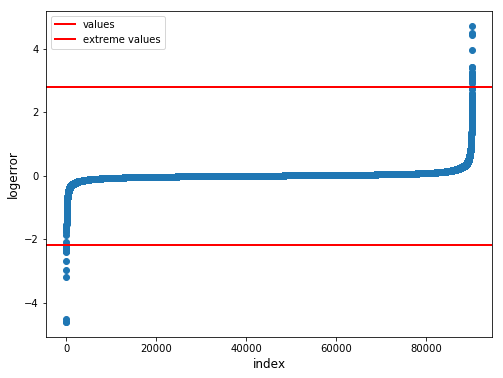

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df3['logerror'].size), np.sort(train_df3['logerror']))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.axhline(y = ceil_y, linewidth = 2, color = 'r')
plt.axhline(y = floor_y, linewidth = 2, color = 'r')
plt.legend(['values', 'extreme values'])
plt.show()

In [92]:
train_y[train_y > ceil_y] = ceil_y
train_y[train_y < floor_y] = floor_y

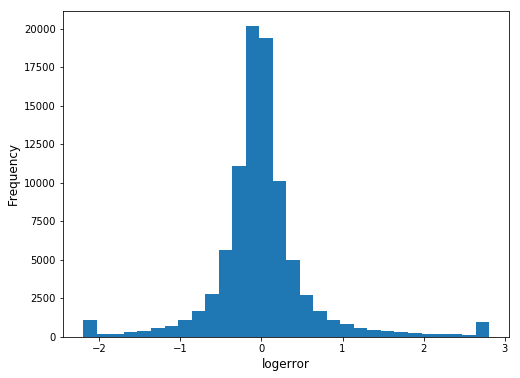

In [93]:
plt.figure(figsize=(8,6))
plt.hist(train_y, bins = 30)
plt.xlabel('logerror', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

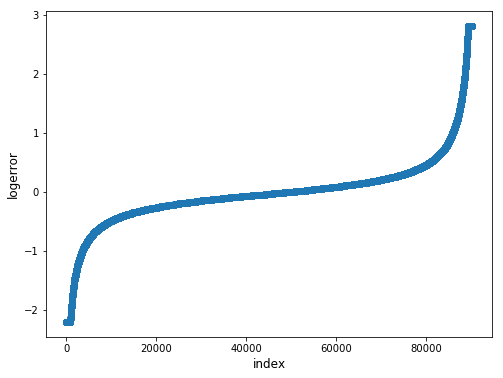

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_y.size), np.sort(train_y))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [95]:
print("Min value: ",min(train_y))
print("Max value: ", max(train_y)) 

Min value:  -2.19742822982
Max value:  2.80873204228


In [96]:
train_df_scale.shape

(90275, 31)

In [98]:
train_df_scale.head()

,logerror,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,transaction_month
parcelid,,,,,,,,,,,,,,,,,,,,,
11016594,0.100217,-4.861395e-01,-0.278287,-0.027558,-1.033247,-0.318860,-0.096443,-0.069359,-0.574474,-0.252120,...,-0.059042,-0.524369,-0.172264,-0.402849,-0.274761,-0.175719,-0.102173,0.109950,-5.904822e-01,-1.724284
14366692,-1.116585,1.322249e-16,1.215342,0.837173,0.000000,1.227922,0.529670,0.584110,0.490213,0.793019,...,0.102679,-0.524369,0.000000,1.921393,0.797193,0.230422,-0.098040,0.609633,-5.247339e-12,-1.724284
12098116,-0.095961,-4.861395e-01,0.717466,-0.892289,-1.033247,0.712328,0.479927,0.532194,-0.574474,0.793019,...,-0.080077,-0.524369,-0.172264,-1.205769,-0.565913,-0.608722,-0.550383,0.804331,-5.729723e-01,-1.724284
12643413,0.064210,-4.861395e-01,-0.278287,-0.892289,-1.033247,-0.318860,-1.010201,-1.023039,-0.574474,-0.252120,...,-0.099473,-0.524369,-0.172264,0.780401,-0.041092,-0.383494,-0.511805,-0.429215,-5.811842e-01,-1.724284
14432541,-0.102169,1.322249e-16,0.219590,0.837173,0.000000,0.196734,0.551298,0.606682,0.490213,-0.252120,...,0.102406,2.312902,0.000000,0.526848,-0.050407,-0.041670,-0.033355,-0.072385,4.849422e-01,-1.724284


### Combine and Prepare for Modeling

In [103]:
train_df_modeling = train_df_scale.drop(["logerror"], axis =1 )
train_df_modeling.head()

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,transaction_month
parcelid,,,,,,,,,,,,,,,,,,,,,
11016594,-4.861395e-01,-0.278287,-0.027558,-1.033247,-0.318860,-0.096443,-0.069359,-0.574474,-0.252120,-6.334037e-16,...,-0.059042,-0.524369,-0.172264,-0.402849,-0.274761,-0.175719,-0.102173,0.109950,-5.904822e-01,-1.724284
14366692,1.322249e-16,1.215342,0.837173,0.000000,1.227922,0.529670,0.584110,0.490213,0.793019,5.362733e-01,...,0.102679,-0.524369,0.000000,1.921393,0.797193,0.230422,-0.098040,0.609633,-5.247339e-12,-1.724284
12098116,-4.861395e-01,0.717466,-0.892289,-1.033247,0.712328,0.479927,0.532194,-0.574474,0.793019,-6.334037e-16,...,-0.080077,-0.524369,-0.172264,-1.205769,-0.565913,-0.608722,-0.550383,0.804331,-5.729723e-01,-1.724284
12643413,-4.861395e-01,-0.278287,-0.892289,-1.033247,-0.318860,-1.010201,-1.023039,-0.574474,-0.252120,-6.334037e-16,...,-0.099473,-0.524369,-0.172264,0.780401,-0.041092,-0.383494,-0.511805,-0.429215,-5.811842e-01,-1.724284
14432541,1.322249e-16,0.219590,0.837173,0.000000,0.196734,0.551298,0.606682,0.490213,-0.252120,5.362733e-01,...,0.102406,2.312902,0.000000,0.526848,-0.050407,-0.041670,-0.033355,-0.072385,4.849422e-01,-1.724284


In [104]:
train_df_modeling.describe()

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,transaction_month
count,9.027500e+04,9.027500e+04,9.027500e+04,9.027500e+04,9.027500e+04,9.027500e+04,9.027500e+04,9.027500e+04,9.027500e+04,9.027500e+04,...,9.027500e+04,9.027500e+04,9.027500e+04,9.027500e+04,9.027500e+04,9.027500e+04,9.027500e+04,9.027500e+04,9.027500e+04,9.027500e+04
mean,2.537824e-16,-4.360543e-15,1.516564e-16,-1.446135e-15,-1.999026e-15,3.082565e-16,-3.810439e-16,-5.573429e-15,-1.375051e-15,-2.156027e-16,...,-2.135905e-15,-4.661697e-15,-1.480033e-15,-1.394884e-14,4.570147e-17,1.331161e-17,1.649316e-16,-1.927674e-16,4.752761e-14,-5.722991e-13
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-4.861395e-01,-2.269792e+00,-2.621751e+00,-3.013396e+00,-1.350048e+00,-1.915307e+00,-1.967691e+00,-5.744738e-01,-1.297260e+00,-5.168920e+00,...,-1.650357e-01,-5.243686e-01,-1.722639e-01,-3.530011e+00,-8.624995e-01,-8.247767e-01,-6.949302e-01,-8.678510e-01,-5.907536e-01,-1.724284e+00
25%,-4.861395e-01,-2.782868e-01,-8.922893e-01,-1.033247e+00,-3.188600e-01,-6.338839e-01,-6.268949e-01,-5.744738e-01,-2.521201e-01,-6.334037e-16,...,-1.073950e-01,-5.243686e-01,-1.722639e-01,-6.564027e-01,-4.724917e-01,-4.661367e-01,-4.896672e-01,-4.549302e-01,-5.760901e-01,-6.576829e-01
50%,1.322249e-16,-2.782868e-01,-2.755836e-02,0.000000e+00,-3.188600e-01,-2.445907e-01,-2.081784e-01,-5.744738e-01,-2.521201e-01,-6.334037e-16,...,-5.275930e-02,-5.243686e-01,-1.722639e-01,1.974041e-02,-2.275951e-01,-2.068934e-01,-2.131267e-01,-2.107088e-01,-5.652994e-01,5.338419e-02
75%,1.322249e-16,7.174659e-01,8.371726e-01,9.469029e-01,7.123279e-01,3.415118e-01,3.019561e-01,4.902134e-01,7.930193e-01,5.362733e-01,...,1.095088e-01,-5.243686e-01,0.000000e+00,7.804014e-01,1.435113e-01,1.494316e-01,1.674936e-01,1.340366e-01,4.849417e-01,7.644513e-01
max,6.659714e+00,1.764526e+01,1.121394e+01,4.247152e+00,1.824252e+01,2.267396e+01,2.061705e+01,3.006747e+00,1.856039e+01,6.329340e+01,...,8.279739e+01,5.859490e+00,2.213706e+02,1.963652e+00,4.680672e+01,4.918615e+01,6.047992e+01,4.620121e+01,3.032677e+00,2.186586e+00


In [105]:
train_df_modeling.shape

(90275, 30)

In [106]:
train_df_modeling.values

array([[ -4.86139510e-01,  -2.78286818e-01,  -2.75583586e-02, ...,
          1.09949811e-01,  -5.90482202e-01,  -1.72428365e+00],
       [  1.32224852e-16,   1.21534222e+00,   8.37172551e-01, ...,
          6.09633094e-01,  -5.24733927e-12,  -1.72428365e+00],
       [ -4.86139510e-01,   7.17465873e-01,  -8.92289268e-01, ...,
          8.04330503e-01,  -5.72972277e-01,  -1.72428365e+00],
       ..., 
       [  1.32224852e-16,  -2.78286818e-01,   8.37172551e-01, ...,
         -5.93435633e-01,  -5.74497002e-01,   2.18658559e+00],
       [  1.32224852e-16,  -2.78286818e-01,  -8.92289268e-01, ...,
         -5.40812380e-01,  -5.66226218e-01,   2.18658559e+00],
       [  1.32224852e-16,  -1.27403951e+00,  -2.75583586e-02, ...,
         -5.00542511e-01,  -5.69040333e-01,   2.18658559e+00]])

## Linear Regression

### Start by splitting into test train set 

In [107]:
from sklearn.model_selection import train_test_split

In [115]:
X = train_df_modeling
y = train_y

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [119]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90275, 30)
(90275,)
(67706, 30)
(22569, 30)
(67706,)
(22569,)


In [120]:
import statsmodels.api as sm

In [135]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     19.73
Date:                Sun, 10 Sep 2017   Prob (F-statistic):          4.73e-105
Time:                        00:01:00   Log-Likelihood:                -63748.
No. Observations:               67706   AIC:                         1.276e+05
Df Residuals:                   67676   BIC:                         1.278e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
airconditioningt

In [136]:
results.params[abs(results.params) > 0.02]

bathroomcnt                    -0.023726
calculatedfinishedsquarefeet    0.037439
finishedsquarefeet12            0.026672
fips                            0.853846
rawcensustractandblock         -0.874105
regionidcounty                  0.021199
structuretaxvaluedollarcnt     -0.287618
taxvaluedollarcnt               0.806092
landtaxvaluedollarcnt          -0.517873
taxamount                      -0.115336
censustractandblock             0.041981
dtype: float64

In [139]:
results.pvalues[results.pvalues < 0.05]

bathroomcnt                     4.991800e-02
calculatedfinishedsquarefeet    5.844660e-04
finishedsquarefeet12            7.343086e-03
fips                            1.728423e-03
garagetotalsqft                 2.757122e-02
heatingorsystemtypeid           3.559055e-02
longitude                       8.328680e-03
rawcensustractandblock          1.338874e-03
regionidcounty                  1.593918e-03
regionidzip                     3.552362e-03
structuretaxvaluedollarcnt      5.637658e-09
taxvaluedollarcnt               6.041441e-10
landtaxvaluedollarcnt           3.830924e-08
taxamount                       3.826040e-46
transaction_month               5.790620e-03
dtype: float64

In [140]:
print("Number of pvalue variables: ", len(results.pvalues[results.pvalues < 0.05]))
print("Number of pvalue variables: ", len(results.params[abs(results.params) > 0.02]))

Number of pvalue variables:  15
Number of pvalue variables:  11


## Examine Validation Set 

In [148]:
test_pred = results.predict(X_test)

In [149]:
from sklearn.metrics import r2_score, mean_absolute_error, roc_auc_score, roc_curve

In [150]:
r2_dev = r2_score(y_train, results.fittedvalues)
r2_dev

0.0086062306745706696

In [151]:
r2_itv = r2_score(y_test, test_pred)
r2_itv

0.0084080458883122322

In [152]:
(r2_dev/r2_itv - 1)*100

2.3570849742141409

In [153]:
mean_absolute_error(y_test, test_pred)

0.37654934421149289

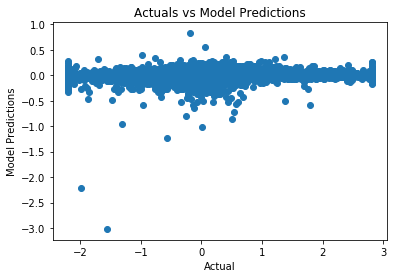

In [154]:
plt.scatter(y_test, test_pred)
plt.xlabel("Actual")
plt.ylabel("Model Predictions")
plt.title("Actuals vs Model Predictions")


In [155]:
results = pd.DataFrame(data = {"y_test": y_test, "test_pred": test_pred})

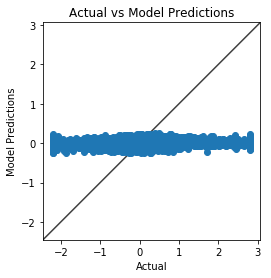

In [156]:
fig, ax = plt.subplots()
ax.scatter(results.y_test[abs(results.test_pred) < 0.25], results.test_pred[abs(results.test_pred) < 0.25])

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel("Actual")
plt.ylabel("Model Predictions")
plt.title("Actual vs Model Predictions")

### VIF Analysis  
We may want to hold this until later when we have a smaller model..

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [158]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [159]:
print(len(vif))
print(len(X.columns))

30
30


In [160]:
vif_series = pd.Series(data = vif, index = X.columns)

In [161]:
vif_series.sort_values()

transaction_month                   1.003680
regionidzip                         1.011031
regionidcity                        1.030883
lotsizesquarefeet                   1.064803
regionidneighborhood                1.164356
airconditioningtypeid               1.239801
unitcnt                             1.243361
buildingqualitytypeid               1.288323
heatingorsystemtypeid               1.289911
propertylandusetypeid               1.537486
garagecarcnt                        1.884592
yearbuilt                           2.169916
garagetotalsqft                     2.352200
latitude                            2.576047
bedroomcnt                          2.586886
roomcnt                             3.561190
longitude                           3.970400
regionidcounty                      7.937819
taxamount                          10.664260
finishedsquarefeet12               16.057216
calculatedfinishedsquarefeet       18.728095
bathroomcnt                        25.456935
fullbathcn

In [162]:
vif_series.describe()

count       30.000000
mean      1043.609777
std       3303.975541
min          1.003680
25%          1.288720
50%          3.074038
75%         42.375004
max      12996.799874
dtype: float64

In [163]:
vif_series[vif_series < 5]

airconditioningtypeid    1.239801
bedroomcnt               2.586886
buildingqualitytypeid    1.288323
garagecarcnt             1.884592
garagetotalsqft          2.352200
heatingorsystemtypeid    1.289911
latitude                 2.576047
longitude                3.970400
lotsizesquarefeet        1.064803
propertylandusetypeid    1.537486
regionidcity             1.030883
regionidneighborhood     1.164356
regionidzip              1.011031
roomcnt                  3.561190
unitcnt                  1.243361
yearbuilt                2.169916
transaction_month        1.003680
dtype: float64

In [164]:
inf_vif_list = vif_series[vif_series == np.inf].index

In [165]:
vif_series1 = vif_series.drop(inf_vif_list.tolist())

In [166]:
len(vif_series1)

30

In [ ]:
vif_series1.head()

In [ ]:
X_vif1 = X.drop(inf_vif_list.tolist(), axis =1)

In [ ]:
X_vif1.shape

In [ ]:
numb_X_cols = X_vif1.shape[1]
X_ndarray_vif1 =X_vif1.values
vif1 = [variance_inflation_factor(X_ndarray_vif1, i) for i in range(numb_X_cols)]

In [ ]:
vif1_series = pd.Series(data = vif1, index = X_vif1.columns) 

In [ ]:
vif1_series.describe()

### Examine Predictions 

In [ ]:
train_predictions = model1.predict(train_df_modeling.values)

In [ ]:
plt.hist(train_predictions, bins = 30)

#plt.hist(train_y)


In [ ]:
plt.hist(train_y.values, bins = 30)

In [ ]:
train_predictions

In [ ]:
len(train_predictions)

In [ ]:
flat_train_preds = []
for prediction in range(0, len(train_predictions)):
    flat_train_preds = train_predictions[prediction][0]

In [ ]:
plt.plot(model2.history['mean_absolute_error'])
plt.plot(model2.history['val_mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Submission Steps

In [ ]:
train_df_new = pd.read_csv("train_2016.csv")
test = pd.read_csv("sample_submission.csv")
prop = pd.read_csv("properties_2016.csv")

In [ ]:
test['parcelid'] = test['ParcelId']
df_test = test.merge(prop, on='parcelid', how = 'left') 
print("Test DF len: " ,len(df_test))
print("Input DF len: ", len(test))

In [ ]:
train_cols1 = train_cols[1:len(train_cols)]

In [ ]:
x_test2 = df_test[train_cols1]
test_mean_values = x_test2.mean(axis=0)
x_test1 = x_test2.fillna(test_mean_values, inplace=True)
x_test = StandardScaler().fit_transform(x_test1)

In [ ]:
predictions = batch_model.predict(x_test)

In [ ]:
sub = pd.read_csv("sample_submission.csv")
for c in sub.columns[sub.columns != 'ParcelId']:
    sub[c] = predictions

In [ ]:
sub.to_csv('nn_starter2.csv', index=False, float_format='%.4f')

In [ ]:
sub.shape